In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline
init_notebook_mode(connected=True)
sns.set_style('whitegrid')

In [232]:
df = pd.read_excel("D:\iamneo\Zomatodataset\Country-Code.xlsx")

In [233]:
df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [234]:
df2 = pd.read_csv("D:\iamneo\Zomatodataset\zomato.csv",encoding='latin-1')

In [235]:
df = pd.merge(df2,df)

In [236]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [237]:
df.shape

(9551, 22)

In [238]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [239]:
for col in df.columns:
    if df[col].isnull().sum()>1:
        print(col,df[col].isnull().sum())

Cuisines 9


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [241]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
numeric_features = [c for c in numeric_data.columns]
cat_features = [ c for c in categorical_data.columns]

In [242]:
numeric_features

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [244]:
cat_features

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

## Testing number of unique values for each categorical data

In [59]:
for i in cat_features:
    print(i,df[i].nunique(),sep='----')

Restaurant Name----7446
City----141
Address----8918
Locality----1208
Locality Verbose----1265
Cuisines----1825
Currency----12
Has Table booking----2
Has Online delivery----2
Is delivering now----2
Switch to order menu----1
Rating color----6
Rating text----6
Country----15


In [245]:
x = df['Restaurant Name'].value_counts()

In [246]:
with pd.option_context('display.max_rows', None,):
    print(x[x>1])

Cafe Coffee Day                              83
Domino's Pizza                               79
Subway                                       63
Green Chick Chop                             51
McDonald's                                   48
Keventers                                    34
Pizza Hut                                    30
Giani                                        29
Baskin Robbins                               28
Barbeque Nation                              26
Barista                                      22
Giani's                                      22
Dunkin' Donuts                               22
Costa Coffee                                 20
Pind Balluchi                                20
Wah Ji Wah                                   19
Twenty Four Seven                            19
Pizza Hut Delivery                           19
Sagar Ratna                                  19
Chaayos                                      18
Starbucks                               

In [247]:
df.loc[df['Restaurant Name']=='Subway']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
675,2400279,Subway,1,Allahabad,"207/53, Mahatma Gandhi Marg, Civil Lines, Alla...",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"Fast Food, American, Salad, Healthy Food",...,No,No,No,No,2,3.4,Orange,Average,32,India
889,18408041,Subway,1,Faridabad,"SF 25, 2nd Floor, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307493,28.470002,"American, Fast Food, Salad, Healthy Food",...,No,No,No,No,2,0.0,White,Not rated,2,India
959,3866,Subway,1,Faridabad,"SCF 78, HUDA Market, Sector 15, Faridabad",Sector 15,"Sector 15, Faridabad",77.321943,28.394826,"American, Fast Food, Salad, Healthy Food",...,No,No,No,No,2,3.5,Yellow,Good,143,India
1196,3449,Subway,1,Gurgaon,"G-6, Central Plaza Mall, Golf Course Road, Gur...","Central Plaza Mall, Golf Course Road","Central Plaza Mall, Golf Course Road, Gurgaon",77.100917,28.443038,"American, Fast Food, Salad, Healthy Food",...,No,Yes,No,No,2,2.5,Orange,Average,150,India
1267,157,Subway,1,Gurgaon,"SG-102, Ground Floor, DLF Galleria, DLF Phase ...","DLF Galleria, DLF Phase 4","DLF Galleria, DLF Phase 4, Gurgaon",77.081404,28.467614,"American, Fast Food, Salad, Healthy Food",...,No,No,No,No,2,2.5,Orange,Average,125,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,3707,Subway,1,Noida,"B-1/24, Central Market, Near City Centre Metro...",Sector 50,"Sector 50, Noida",77.361918,28.570513,"American, Fast Food, Salad, Healthy Food",...,No,No,No,No,2,2.5,Orange,Average,165,India
8884,308758,Subway,1,Noida,"A-44-45, Galaxy IT Park, Sector 62, Noida",Sector 62,"Sector 62, Noida",77.370417,28.624539,"American, Fast Food, Salad, Healthy Food",...,No,Yes,No,No,2,2.5,Orange,Average,28,India
8923,7909,Subway,1,Noida,"C Block, Logic Cyber Park, Sector 62, Noida",Sector 62,"Sector 62, Noida",77.366493,28.612903,"American, Fast Food, Salad, Healthy Food",...,No,Yes,No,No,2,2.4,Red,Poor,88,India
9041,4482,Subway,1,Noida,"Food Court, 2nd Floor, Spice World Mall, Secto...","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.339801,28.586405,"American, Fast Food, Salad, Healthy Food",...,No,Yes,No,No,2,3.4,Orange,Average,93,India


In [96]:
x[x>1].size

734

In [97]:
x[x==1].size

6712

## observation

1. 734 restaurents which have more than one branch that  comes in zomato
2. 6712 restaurents which have only one branch that comes in zomato

In [119]:
a = df.groupby('Country')['Restaurant Name'].count().reset_index().sort_values(by='Restaurant Name',ascending=False)

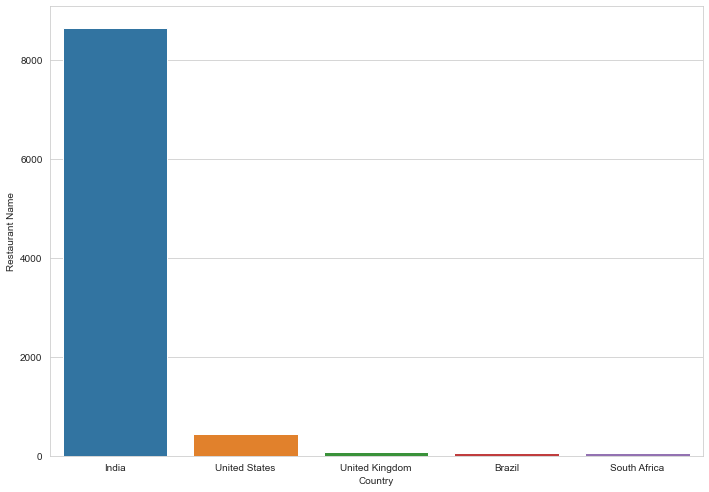

In [128]:
matplotlib.rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x=a['Country'][:5],y=a['Restaurant Name'][:5])

## Observation:
 India is using the zomato more than other country

In [248]:
df_ind = df[df['Country']=='India'] # creating new dataframe with records that belongs only to India


## Top 5 city & locality in india which have more restaurents  (Q1)

In [448]:
res_ = df_ind.groupby('City')['Restaurant ID'].size().reset_index().sort_values(by='Restaurant ID',ascending = False).head()
res_.rename(columns={'Restaurant ID':'no of restaurents'},inplace = True)

In [449]:
res_   # solution for q1

,City,no of restaurents
31,New Delhi,5473
15,Gurgaon,1118
32,Noida,1080
12,Faridabad,251
13,Ghaziabad,25


In [265]:
res = df_ind.groupby('Locality')['Restaurant ID'].size().reset_index().sort_values(by='Restaurant ID',ascending = False).head()
res.rename(columns={'Restaurant ID':'no of restaurents'},inplace = True)

In [263]:
res       # solution for q1

,Locality,no of restaurents
113,Connaught Place,122
513,Rajouri Garden,99
630,Shahdara,87
156,Defence Colony,86
392,Malviya Nagar,85


## Create a table that shows city and how many restaurents are there for each price range. (Q2)


In [275]:

## grouping it by city for differnt prices ranges 

df_ind_4=df_india[df_india['Price range'] == 4].groupby('City')['Restaurant ID'].size().reset_index().sort_values(by='City')
df_ind_3=df_india[df_india['Price range'] == 3].groupby('City')['Restaurant ID'].size().reset_index().sort_values(by='City')
df_ind_2=df_india[df_india['Price range'] == 2].groupby('City')['Restaurant ID'].size().reset_index().sort_values(by='City')
df_ind_1=df_india[df_india['Price range'] == 1].groupby('City')['Restaurant ID'].size().reset_index().sort_values(by='City')

In [279]:
df_ind_4.rename(columns={'Restaurant ID':'price_range-4'},inplace=True)

In [280]:
a = pd.merge(df_ind_1,df_ind_2,on='City',how='outer')
b = pd.merge(df_ind_3,df_ind_4,on='City',how='outer')
df_ind_rating = pd.merge(a,b,on='City',how='outer')


 The  data frame will show you how many restaurants in each price range located in each city

In [282]:
df_ind_rating.head()        ## solution for Q2

,City,price_range-1,price_range-2,price_range-3,price_range-4
0,Agra,3.0,6.0,6.0,5.0
1,Ahmedabad,1.0,8.0,11.0,1.0
2,Allahabad,2.0,4.0,13.0,1.0
3,Amritsar,7.0,11.0,3.0,NaN
4,Aurangabad,1.0,15.0,3.0,1.0


In [226]:
## Locality thats has more no of restaurents that has price range in india (Q3)

In [288]:
df_ind_4.sort_values(by='price_range-4',ascending=False).head()    # solution for q3

,City,price_range-4
24,New Delhi,216
12,Gurgaon,67
25,Noida,21
11,Goa,13
28,Puducherry,8


In [296]:
df_ind[df_ind['Price range']==4].groupby('City')['Restaurant ID'].count().sort_values(ascending=False).head() # direct approch for q3

City
New Delhi     216
Gurgaon        67
Noida          21
Goa            13
Puducherry      8
Name: Restaurant ID, dtype: int64

## Top rated restaurents in coimbatore (Q4)

In [308]:
df_ind[(df_ind['City']=='Coimbatore')&(df_ind['Rating text'] == 'Excellent')]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
825,18260777,Kuchi n Kream,1,Coimbatore,"353/1, Hotel Landmark Complex, Bharathiaar Roa...",Gandhipuram,"Gandhipuram, Coimbatore",76.972076,11.016298,"Cafe, Continental, Fast Food",...,No,Yes,No,No,3,4.6,Dark Green,Excellent,202,India
832,3000195,Valarmathi Kongunaatu Samayal,1,Coimbatore,"207/A, CSI Compound, Opposite Photo Centre, Ra...",Race Course,"Race Course, Coimbatore",76.976268,11.001852,"South Indian, Biryani",...,No,No,No,No,2,4.5,Dark Green,Excellent,380,India
841,3001321,CakeBee,1,Coimbatore,"6/1, SRP Nagar, Saibaba Colony, Coimbatore",Saibaba Colony,"Saibaba Colony, Coimbatore",76.944652,11.026117,"Bakery, Desserts",...,No,Yes,No,No,2,4.9,Dark Green,Excellent,200,India


In [313]:
df_ind['Cuisines'].nunique()

1392

## Most liked cuisines of each city and number of restaurents under each cuisines (Q5)


In [419]:
a = pd.DataFrame(df_ind.groupby(['City',"Cuisines"])['Restaurant ID'].count().sort_values(ascending=False))
a.rename(columns={'Restaurant ID':'no of res'})

no of res
City      Cuisines                                                    
New Delhi North Indian                                             658
          North Indian, Chinese                                    284
          Fast Food                                                242
          Chinese                                                  228
          North Indian, Mughlai                                    207
...                                                                ...
          Fast Food, Raw Meats                                       1
          Fast Food, South Indian, Chinese                           1
          Fast Food, South Indian, Chinese, Mithai                   1
          Fast Food, South Indian, Mithai                            1
Agra      Cafe, Italian, Mexican, North Indian, Continental          1

[2220 rows x 1 columns]

## Top 7 locality in new delhi which has more number of restaurants (Q6)

In [443]:
new = df_ind[df_ind['City']=='New Delhi'].groupby('Locality')['Restaurant ID'].count().sort_values(ascending=False).reset_index()
px.bar(x=new['Locality'][:7],y=new['Restaurant ID'][:7],labels={'x':'loaclity','y':'no of restaurants'},title='top 7 locality in new delhi')

## Geoplotting with info lat and long with respective restaurant name and its rating (Q7)

In [470]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_ind, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Restaurant Name", 
                        hover_data=["Restaurant Name", "Aggregate rating"],
                        color="Aggregate rating",
                        color_continuous_scale=color_scale,
                        size="Aggregate rating",
                        zoom=8, 
                        height=500,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()